# Libraries

In [ ]:
!pip install -U giotto-tda

     |████████████████████████████████| 1.5 MB 5.0 MB/s 
     |████████████████████████████████| 23.2 MB 1.4 MB/s 
     |████████████████████████████████| 404 kB 52.0 MB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
     |████████████████████████████████| 23.9 MB 14 kB/s 
     |████████████████████████████████| 3.2 MB 56.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depen

In [ ]:
import pandas as pd
import numpy as np
import math
import gtda.time_series as ts
import gtda.diagrams as diag
import gtda.homology as hl
from gtda.plotting import plot_heatmap # gtda plotting functions
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgnu3YLmJY33WkfBCouhoVkRfwYVXFASoWAR5_HR9LrS4oycgpKb18
Mounted at /content/drive


# Loading and transforming data

In [4]:
start_date = '2019-01-01'
end_date = '2020-04-07'

In [5]:
sp500 = pd.read_csv("/content/drive/My Drive/TDA on Financial Markets/SP500.csv")
sp500 = sp500[(sp500['Date'] > start_date) & (sp500['Date'] <= end_date) ].reset_index(drop=True)
sp500['Date'] = sp500['Date'].apply(pd.Timestamp)
sp500.set_index('Date', inplace=True)
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000
...,...,...,...,...,...,...
2020-04-01,2498.080078,2522.750000,2447.489990,2470.500000,2470.500000,5947900000
2020-04-02,2458.540039,2533.219971,2455.790039,2526.899902,2526.899902,6454990000
2020-04-03,2514.919922,2538.179932,2459.959961,2488.649902,2488.649902,6087190000


In [ ]:
dates = sp500.index
dates

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30',
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-06', '2020-04-07'],
              dtype='datetime64[ns]', name='Date', length=319, freq=None)

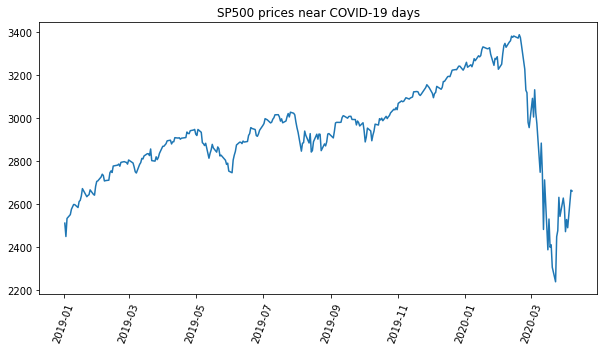

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(dates, sp500['Close'])
plt.xticks(rotation=70)
plt.title('SP500 prices near COVID-19 days')
plt.show()

## Getting log-returns

In [ ]:
sp500_log = np.zeros(len(sp500))
sp500_log[0] = 0
for i in range(1, len(sp500)):
  sp500_log[i] = math.log(sp500['Adj Close'][dates[i]]/sp500['Adj Close'][dates[i-1]])

sp500['Log-return'] = pd.Series(sp500_log, index=dates)
sp500.drop(dates[0], axis=0, inplace = True)
dates = sp500.index
sp500

,Open,High,Low,Close,Adj Close,Volume,Log-return
Date,,,,,,,
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000,-0.025068
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000,0.033759
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000,0.006986
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000,0.009649
2019-01-09,2580.000000,2595.320068,2568.889893,2584.959961,2584.959961,4052480000,0.004090
...,...,...,...,...,...,...,...
2020-04-01,2498.080078,2522.750000,2447.489990,2470.500000,2470.500000,5947900000,-0.045146
2020-04-02,2458.540039,2533.219971,2455.790039,2526.899902,2526.899902,6454990000,0.022573
2020-04-03,2514.919922,2538.179932,2459.959961,2488.649902,2488.649902,6087190000,-0.015253


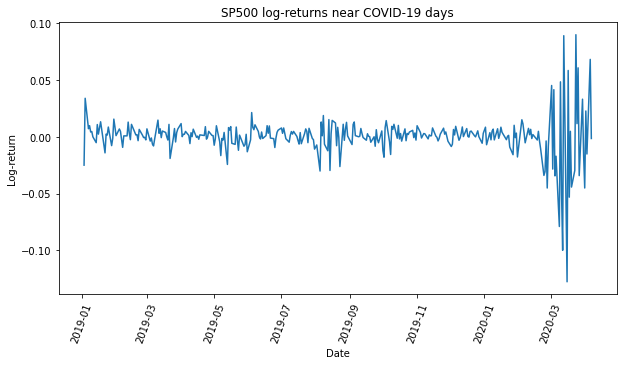

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Log-return', data=sp500)
plt.xticks(rotation=70)
plt.title('SP500 log-returns near COVID-19 days')
plt.show()

# Methodology

## Time delay embedding (Taken's embedding)

In [ ]:
embedding_dimension = 3
embedding_time_delay = 2

In [ ]:
embedder = ts.SingleTakensEmbedding(
    parameters_type="fixed",
    dimension=embedding_dimension,
    time_delay=embedding_time_delay,
    n_jobs=-1,
)

In [ ]:
log_returns_embedded = embedder.fit_transform(sp500['Log-return'].values)

In [ ]:
print(log_returns_embedded.shape)
print(len(sp500))

(314, 3)
318


In [ ]:
log_returns_embedded[0]

array([-0.02506833,  0.00698598,  0.00408967])

In [ ]:
sp500['Log-return'].head(20)

Date
2019-01-03   -0.025068
2019-01-04    0.033759
2019-01-07    0.006986
2019-01-08    0.009649
2019-01-09    0.004090
2019-01-10    0.004508
2019-01-11   -0.000146
2019-01-14   -0.005271
2019-01-15    0.010665
2019-01-16    0.002220
2019-01-17    0.007563
2019-01-18    0.013097
2019-01-22   -0.014258
2019-01-23    0.002200
2019-01-24    0.001375
2019-01-25    0.008453
2019-01-28   -0.007878
2019-01-29   -0.001457
2019-01-30    0.015430
2019-01-31    0.008561
Name: Log-return, dtype: float64

### Rolling window

In [ ]:
window_size = 60
window_stride = 1

In [ ]:
sliding_window = ts.SlidingWindow(size=window_size, stride=window_stride)

In [ ]:
log_returns_embedded_windows = sliding_window.fit_transform(log_returns_embedded)

In [ ]:
print(f'Number of windows: {log_returns_embedded_windows.shape[0]}')
print(f'Window size: {log_returns_embedded_windows.shape[1]}')
print(f'Embedding dimension: {log_returns_embedded_windows.shape[2]}')
log_returns_embedded_windows.shape

Number of windows: 255
Window size: 60
Embedding dimension: 3


(255, 60, 3)

Getting windows of prices

In [ ]:
window_size_price = window_size + (embedding_dimension-1)* embedding_time_delay
sliding_window_price = ts.SlidingWindow(size=window_size_price, stride=window_stride)
price_windows = sliding_window_price.fit_transform(sp500['Close'])
# define time index to combine with numpy arrays
window_indices = sliding_window_price.slice_windows(sp500['Close'])
indices = [win[1]-1 for win in window_indices]
time_index = sp500.iloc[indices].index

In [ ]:
print(f'Number of windows: {price_windows.shape[0]}')
print(f'Window size: {price_windows.shape[1]}')
price_windows.shape

Number of windows: 255
Window size: 64


(255, 64)

In [ ]:
print(f'Each window is represented by dates: {time_index.shape}')

Each window is represented by dates: (255,)


In [ ]:
i = 0
print(time_index[i])
print(sp500['Close'][time_index[i]])
print(sp500['Log-return'][time_index[i]])
print(log_returns_embedded_windows[i][-1][-1])

2019-04-04 00:00:00
2879.389893
0.0020824655091414477
0.0020824655091414477


## Persistence Diagram and Persistence Landscapes



In [ ]:
homology_dimensions = (0, 1) # homology dimensions of interest
VR = hl.VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs=-1) # Vietoris Rips persistence diagrams
diagrams = VR.fit_transform(log_returns_embedded_windows)

In [ ]:
p_landscape = diag.PersistenceLandscape(n_layers=4, n_jobs=-1, n_bins=500)
landscapes = p_landscape.fit_transform(diagrams)

In [ ]:
i = log_returns_embedded_windows.shape[0]-20
time_index[i]

Timestamp('2020-03-11 00:00:00')

In [ ]:
p_landscape.plot(landscapes, sample=i)

In [ ]:
print(diagrams.shape)
print(landscapes.shape)
print(len(time_index))

(255, 82, 3)
(255, 8, 500)
255


## Distance between persistence landscapes

In [ ]:
p = 2
n_layers = 4
PD = diag.PairwiseDistance(metric='landscape',
                      metric_params={'p': p, 'n_layers': n_layers, 'n_bins': 1000},
                      order=None, n_jobs=-1)

distance_L = PD.fit_transform(diagrams)
distance_L.shape

(255, 255, 2)

In [ ]:
plot_heatmap(distance_L[:, :, 0], colorscale='blues', title="Distances between persistance landscapes of 0-dimensional persistence diagrams")

In [ ]:
plot_heatmap(distance_L[:, :, 1], colorscale='blues', title="Distances between persistance landscapes of 1-dimensional persistence diagrams")

## Analysis of distances

In [ ]:
time_index

DatetimeIndex(['2019-04-04', '2019-04-05', '2019-04-08', '2019-04-09',
               '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-15',
               '2019-04-16', '2019-04-17',
               ...
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30',
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-06', '2020-04-07'],
              dtype='datetime64[ns]', name='Date', length=255, freq=None)

In [ ]:
distance_L.shape

(255, 255, 2)

In [ ]:
dates[(window_size+(embedding_dimension-1)*embedding_time_delay-1)]

Timestamp('2019-04-04 00:00:00')

### Creation of Turbulence Index (PHTI)

In [ ]:
outer_window = 60

In [ ]:
phti0 = []
phti1 = []
times = []

for j, time in enumerate(time_index[outer_window:]):

  phti0.append(distance_L[j, j+outer_window, 0])
  phti1.append(distance_L[j, j+outer_window, 1])

  times.append(time) 

phti0 = np.array(phti0)
phti1 = np.array(phti1)

In [ ]:
phti0 = []
phti1 = []
times = []

for j, time in enumerate(time_index[outer_window:]):

  phti0.append(distance_L[j, j+outer_window, 0])
  phti1.append(distance_L[j, j+outer_window, 1])

  times.append(time) 

phti0 = np.array(phti0)
phti1 = np.array(phti1)

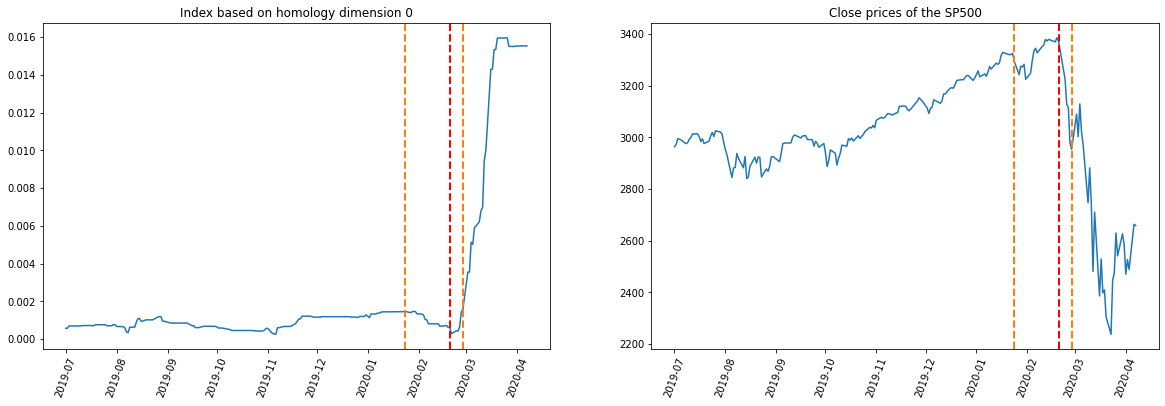

In [ ]:
# using outer_window of 60
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.plot(times, phti0)
plt.axvline(x=times[143], linewidth=2, color='#ff7f0e', linestyle='--')
plt.axvline(x=times[161], linewidth=2, color='red', linestyle='--')
plt.axvline(x=times[167], linewidth=2, color='#ff7f0e', linestyle='--')
plt.tick_params(axis='x', rotation=70)
plt.title("Index based on homology dimension 0")

plt.subplot(1,2,2)
plt.plot(times, sp500['Close'][times])
plt.axvline(x=times[143], linewidth=2, color='#ff7f0e', linestyle='--')
plt.axvline(x=times[161], linewidth=2, color='red', linestyle='--')
plt.axvline(x=times[167], linewidth=2, color='#ff7f0e', linestyle='--')
plt.tick_params(axis='x', rotation=70)
plt.title("Close prices of the SP500")

plt.savefig("/content/drive/My Drive/TDA on Financial Markets/Images/index_vs_prices.png")

In [ ]:
len(times)

195

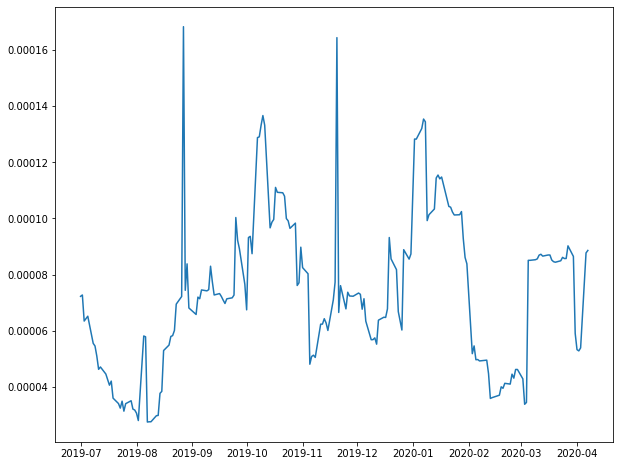

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(times, phti1)
#plt.axvline(x=times[216], linewidth=2, color='#ff7f0e', linestyle='--')
#plt.tick_params(axis='x', rotation=70)
#plt.title("Index based on homology dimension 1")

In [ ]:
outer_window = 5

In [ ]:
phti0 = []
phti1 = []
times = []

for j, time in enumerate(time_index[outer_window:]):

  phti0.append(distance_L[j, j+outer_window, 0])
  phti1.append(distance_L[j, j+outer_window, 1])

  times.append(time) 

phti0 = np.array(phti0)
phti1 = np.array(phti1)

In [ ]:
phti0 = np.array(phti0)
phti1 = np.array(phti1)

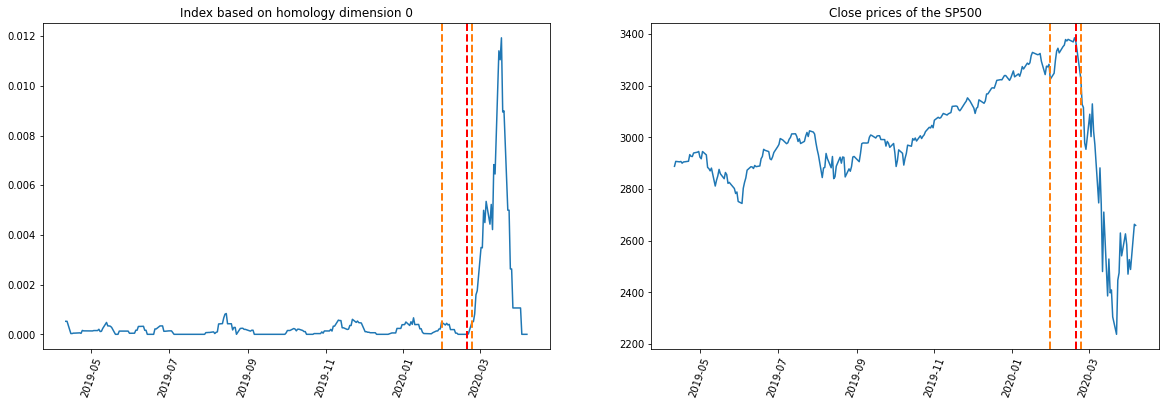

In [ ]:
# using outer_window of 5
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.plot(times, phti0)
plt.axvline(x=times[203], linewidth=2, color='#ff7f0e', linestyle='--')
plt.axvline(x=times[216], linewidth=2, color='red', linestyle='--')
plt.axvline(x=times[218], linewidth=2, color='#ff7f0e', linestyle='--')
plt.tick_params(axis='x', rotation=70)
plt.title("Index based on homology dimension 0")

plt.subplot(1,2,2)
plt.plot(times, sp500['Close'][times])
plt.axvline(x=times[203], linewidth=2, color='#ff7f0e', linestyle='--')
plt.axvline(x=times[216], linewidth=2, color='red', linestyle='--')
plt.axvline(x=times[218], linewidth=2, color='#ff7f0e', linestyle='--')
plt.tick_params(axis='x', rotation=70)
plt.title("Close prices of the SP500")

plt.savefig("/content/drive/My Drive/TDA on Financial Markets/Images/index_vs_prices.png")

Text(0.5, 1.0, 'Index based on homology dimension 1')

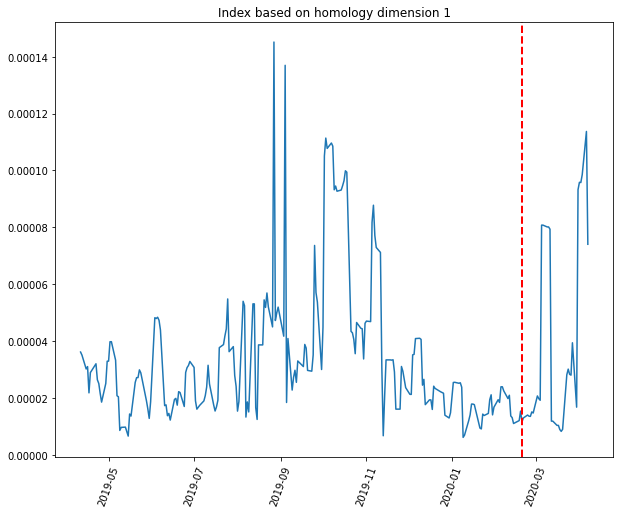

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(times, phti1)
plt.axvline(x=times[216], linewidth=2, color='red', linestyle='--')
plt.tick_params(axis='x', rotation=70)
plt.title("Index based on homology dimension 1")

In [ ]:
print(times[:2])
print(times[-2:])

[Timestamp('2019-04-11 00:00:00'), Timestamp('2019-04-12 00:00:00')]
[Timestamp('2020-04-06 00:00:00'), Timestamp('2020-04-07 00:00:00')]


In [ ]:
times.index(pd.Timestamp('2020-02-20'))

216

In [ ]:
times[150]

Timestamp('2019-11-13 00:00:00')

In [ ]:
print(phti0[189:216].max())
print(list(phti0).index(phti0[189:216].max()))

0.000487163181830724
203


In [ ]:
antiguo_maximo = phti0[189:216].max()

for i in range(189, len(times), 1):
  if phti0[i] > antiguo_maximo:
    time_signal = i
    break
    
print(phti0[time_signal])
print(times[time_signal])
print(time_signal)

0.0005070216584080549
2020-02-24 00:00:00
218


# Comparison with PHTI (Baitinger and Flegel)

In [ ]:
start_date = '2019-01-01'
end_date = '2020-04-07'

In [6]:
industry_portfolio = pd.read_csv("/content/drive/My Drive/TDA on Financial Markets/10_Industry_Portfolios_Daily.csv")
industry_portfolio = industry_portfolio.rename(columns={"Unnamed: 0": "Date"})
industry_portfolio = industry_portfolio.astype({'Date': 'string'})
industry_portfolio['Date'] = industry_portfolio['Date'].apply(lambda date: date[:4]+"-"+date[4:6]+"-"+date[6:])
industry_portfolio = industry_portfolio[(industry_portfolio['Date'] > start_date) & (industry_portfolio['Date'] <= end_date)].reset_index(drop=True)
industry_portfolio['Date'] = industry_portfolio['Date'].apply(pd.Timestamp)
industry_portfolio.set_index("Date", inplace=True)

In [7]:
industry_portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
2019-01-02,-0.28,-0.58,0.32,2.17,0.15,1.16,0.78,-0.98,-1.46,0.47
2019-01-03,-0.74,-2.81,-2.68,-1.22,-4.35,-0.20,-1.65,-2.13,0.05,-2.21
2019-01-04,2.61,4.33,3.74,3.69,4.45,2.51,2.95,3.46,1.72,3.47
2019-01-07,-0.21,2.82,0.61,1.31,0.94,0.77,2.19,1.17,-0.40,0.70
2019-01-08,1.26,1.55,1.24,0.67,1.17,1.27,1.08,0.96,1.47,0.64
...,...,...,...,...,...,...,...,...,...,...
2020-04-01,-3.34,-6.55,-4.21,-4.40,-4.66,-3.01,-2.79,-4.00,-6.20,-5.58
2020-04-02,2.32,-2.44,1.76,9.00,1.89,2.97,0.80,3.47,3.39,1.80
2020-04-03,0.44,0.41,-1.29,-1.32,-1.72,-2.39,-1.10,-0.68,-3.29,-2.67


In [8]:
point_cloud = industry_portfolio.to_numpy()

In [9]:
point_cloud

array([[-0.28, -0.58,  0.32, ..., -0.98, -1.46,  0.47],
       [-0.74, -2.81, -2.68, ..., -2.13,  0.05, -2.21],
       [ 2.61,  4.33,  3.74, ...,  3.46,  1.72,  3.47],
       ...,
       [ 0.44,  0.41, -1.29, ..., -0.68, -3.29, -2.67],
       [ 4.48,  8.16,  7.14, ...,  4.97,  7.43,  7.92],
       [ 0.54,  3.87, -0.16, ..., -1.34, -0.79,  0.56]])

In [10]:
window_size = 60
window_stride = 1

In [11]:
sliding_window = ts.SlidingWindow(size=window_size, stride=window_stride)

In [12]:
point_cloud_windows = sliding_window.fit_transform(point_cloud)

In [13]:
point_cloud_windows[:5,:5,:5]

array([[[-0.28, -0.58,  0.32,  2.17,  0.15],
        [-0.74, -2.81, -2.68, -1.22, -4.35],
        [ 2.61,  4.33,  3.74,  3.69,  4.45],
        [-0.21,  2.82,  0.61,  1.31,  0.94],
        [ 1.26,  1.55,  1.24,  0.67,  1.17]],

       [[-0.74, -2.81, -2.68, -1.22, -4.35],
        [ 2.61,  4.33,  3.74,  3.69,  4.45],
        [-0.21,  2.82,  0.61,  1.31,  0.94],
        [ 1.26,  1.55,  1.24,  0.67,  1.17],
        [-0.8 ,  1.45,  0.36,  1.63,  1.  ]],

       [[ 2.61,  4.33,  3.74,  3.69,  4.45],
        [-0.21,  2.82,  0.61,  1.31,  0.94],
        [ 1.26,  1.55,  1.24,  0.67,  1.17],
        [-0.8 ,  1.45,  0.36,  1.63,  1.  ],
        [ 0.46,  0.63,  1.03,  0.33,  0.46]],

       [[-0.21,  2.82,  0.61,  1.31,  0.94],
        [ 1.26,  1.55,  1.24,  0.67,  1.17],
        [-0.8 ,  1.45,  0.36,  1.63,  1.  ],
        [ 0.46,  0.63,  1.03,  0.33,  0.46],
        [ 0.42,  1.42,  0.01, -0.8 , -0.24]],

       [[ 1.26,  1.55,  1.24,  0.67,  1.17],
        [-0.8 ,  1.45,  0.36,  1.63,  1.  ],
  

In [14]:
print(f'Number of windows: {point_cloud_windows.shape[0]}')
print(f'Window size: {point_cloud_windows.shape[1]}')
print(f'Embedding dimension: {point_cloud_windows.shape[2]}')
point_cloud_windows.shape

Number of windows: 260
Window size: 60
Embedding dimension: 10


(260, 60, 10)

In [15]:
homology_dimensions = (0, 1) # homology dimensions of interest
VR = hl.VietorisRipsPersistence(homology_dimensions=homology_dimensions, n_jobs=-1) # Vietoris Rips persistence diagrams
diagrams = VR.fit_transform(point_cloud_windows)

In [16]:
p = 2
PD = diag.PairwiseDistance(metric='wasserstein', order=None, n_jobs=-1)
distance_L = PD.fit_transform(diagrams)
distance_L.shape

(260, 260, 2)

In [31]:
time_index = industry_portfolio.index[59:]

In [18]:
print(len(time_index))
print(point_cloud_windows.shape)

260
(260, 60, 10)


In [19]:
outer_window = 1

In [32]:
phti0 = []
phti1 = []
times = time_index[outer_window:]

for j, time in enumerate(time_index[outer_window:]):

  phti0.append(distance_L[j, j+outer_window, 0])
  phti1.append(distance_L[j, j+outer_window, 1])

phti0 = np.array(phti0)
phti1 = np.array(phti1)

In [22]:
phti0[:10].sum()

5.395432518351136

In [38]:
def moving_average(window, array):
  ma = []
  for i in range(len(array)-window+1):
    sum = array[i:(i+window)].sum()
    ma.append(sum/window)
  
  return np.array(ma)

In [39]:
phti0_ma = moving_average(60, phti0)
phti1_ma = moving_average(60, phti1)

In [41]:
print(len(phti0_ma))
print(len(phti0))
print(len(times))
times = times[59:]
print(len(times))

200
259
259
200


Text(0.5, 1.0, 'Close prices of the SP500')

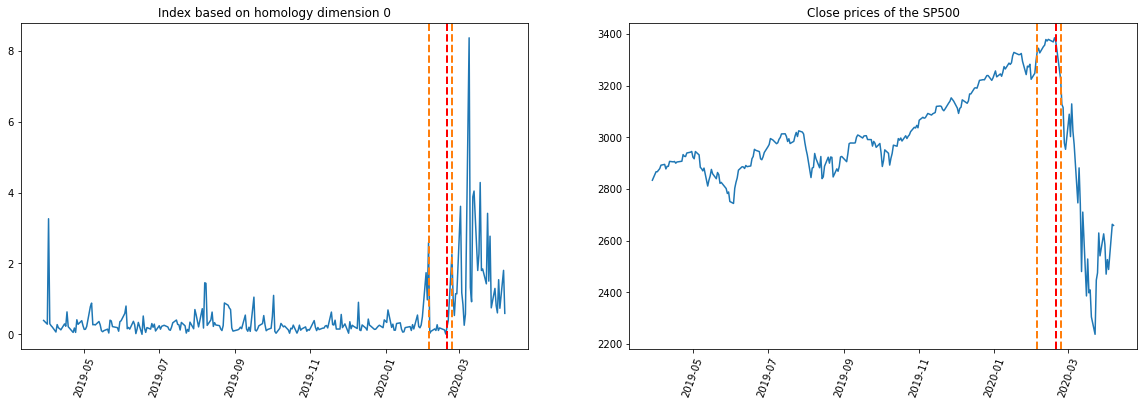

In [ ]:
# using outer_window of 5
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.plot(times, phti0)
plt.axvline(x=times[215], linewidth=2, color='#ff7f0e', linestyle='--')
plt.axvline(x=times[225], linewidth=2, color='red', linestyle='--')
plt.axvline(x=times[227], linewidth=2, color='#ff7f0e', linestyle='--')
plt.tick_params(axis='x', rotation=70)
plt.title("Index based on homology dimension 0")

plt.subplot(1,2,2)
plt.plot(times, sp500['Close'][times])
plt.axvline(x=times[215], linewidth=2, color='#ff7f0e', linestyle='--')
plt.axvline(x=times[225], linewidth=2, color='red', linestyle='--')
plt.axvline(x=times[227], linewidth=2, color='#ff7f0e', linestyle='--')
plt.tick_params(axis='x', rotation=70)
plt.title("Close prices of the SP500")

#plt.savefig("/content/drive/My Drive/TDA on Financial Markets/Images/index_vs_prices.png")

In [ ]:
maximo = phti0[210]
index_max = 210

for i in range(210,225):
  if phti0[i] > maximo:
    maximo = phti0[i]
    index_max = i

print(maximo, index_max, times[index_max])

2.589260687353391 215 2020-02-05 00:00:00


In [ ]:
maximo2 = phti0[225]
index_max2 = 225

for i in range(225,231):
  if phti0[i] > maximo2:
    maximo2 = phti0[i]
    index_max2 = i

print(maximo2, index_max2, times[index_max2])

2.252215413973968 227 2020-02-24 00:00:00


Text(0.5, 1.0, 'Index based on homology dimension 1')

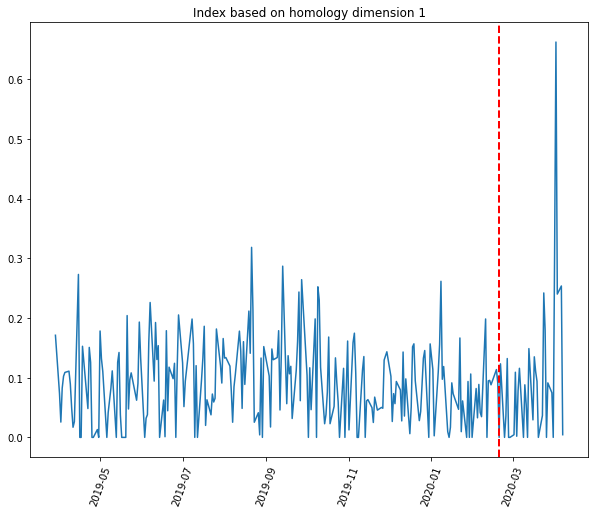

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(times, phti1)
plt.axvline(x=times[225], linewidth=2, color='red', linestyle='--')
plt.tick_params(axis='x', rotation=70)
plt.title("Index based on homology dimension 1")

In [50]:
print(times[166])

Timestamp('2020-02-20 00:00:00')

In [71]:
times

DatetimeIndex(['2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27',
               '2019-06-28', '2019-07-01', '2019-07-02', '2019-07-03',
               '2019-07-05', '2019-07-08',
               ...
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30',
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-06', '2020-04-07'],
              dtype='datetime64[ns]', name='Date', length=200, freq=None)

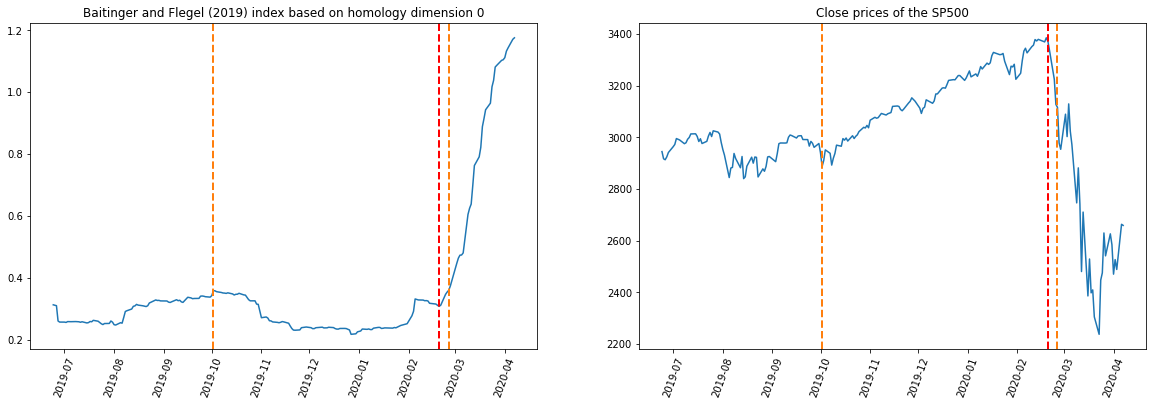

In [70]:
# using outer_window of 5
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.plot(times, phti0_ma)
plt.axvline(x=times[70], linewidth=2, color='#ff7f0e', linestyle='--')
plt.axvline(x=times[166], linewidth=2, color='red', linestyle='--')
plt.axvline(x=times[170], linewidth=2, color='#ff7f0e', linestyle='--')
plt.tick_params(axis='x', rotation=70)
plt.title("Baitinger and Flegel (2019) index based on homology dimension 0")

plt.subplot(1,2,2)
plt.plot(times, sp500['Close'][times])
plt.axvline(x=times[70], linewidth=2, color='#ff7f0e', linestyle='--')
plt.axvline(x=times[166], linewidth=2, color='red', linestyle='--')
plt.axvline(x=times[170], linewidth=2, color='#ff7f0e', linestyle='--')
plt.tick_params(axis='x', rotation=70)
plt.title("Close prices of the SP500")

plt.savefig("/content/drive/My Drive/TDA on Financial Markets/Images/index_vs_prices_phti_orig.png")

In [56]:
maximo = phti0_ma[0]
index_max = 0

for i in range(111):
  if phti0_ma[i] > maximo:
    maximo = phti0_ma[i]
    index_max = i

print(maximo, index_max, times[index_max])

0.3589406635610323 70 2019-10-02 00:00:00


In [62]:
maximo2 = phti0_ma[150]
index_max2 = 150

for i in range(150,189):
  if phti0_ma[i] > maximo:
    maximo2 = phti0_ma[i]
    index_max2 = i
    break

print(maximo2, index_max2, times[index_max2])

0.36017627805886737 170 2020-02-26 00:00:00


Text(0.5, 1.0, 'Index based on homology dimension 1')

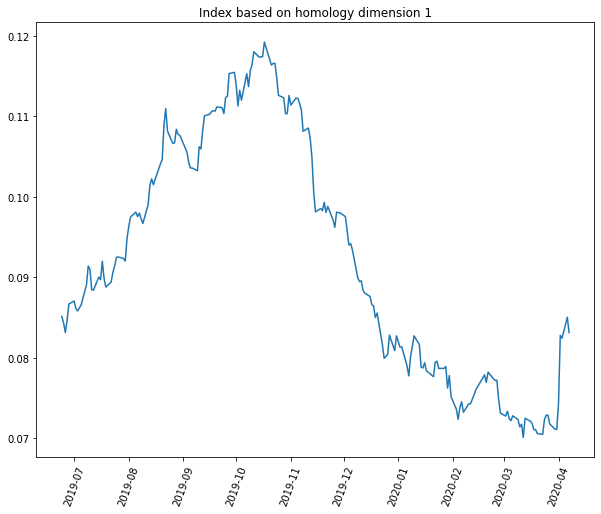

In [44]:
plt.figure(figsize=(10,8))
plt.plot(times, phti1_ma)
#plt.axvline(x=times[225], linewidth=2, color='red', linestyle='--')
plt.tick_params(axis='x', rotation=70)
plt.title("Index based on homology dimension 1")